In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_excel("103_upset (around 21000 points).xls", header= 3)
df.head(6)

,Time,,Flow,Flow.1,Flow.2,Flow.3,Flow.4,Flow.5,Press,Press.1,...,Press.4,Press.5,Press.6,Press.7,Temp,Temp.1,Temp.2,Temp.3,Temp.4,oxygen
0,NaN,NaN,BFW,BFW,Steam,Steam,Fuel gas,Air,FD disch,Fuel gas,...,ignitor,steam drm,steam drm,flue gas,Dertor,steam drm,super,super,flue gas,%
1,NaN,,92fi300.pv,92fy300.pv,92fi301.pv,92fi301.pv,92fi305.pv,92fi302.pv,92pi317.pv,92pi311.pv,...,92pi324.pv,92pi307.pv,92pi301.pv,92pi300.pv,93ti211.pv,92ti300a.pv,92ti300b.pv,92ti311.pv,92ti300.pv,92ai300.pv
2,NaN,2008-06-21 07:00:00,355.848491,355.234993,352.095325,352.095325,401.596232,1.12351,9.716322,7.576174,...,7.780427,628.271028,649.402659,0.310961,298.276672,597.732324,760.399808,765.36439,335.989723,2.05269
3,NaN,2008-06-21 07:00:01,355.877026,355.345775,354.608066,354.608066,401.471854,1.111719,9.716363,7.576189,...,7.780427,628.270974,649.402513,0.310964,298.276689,597.732295,760.399987,765.36489,335.989571,2.030534
4,NaN,2008-06-21 07:00:02,355.90556,355.456557,356.111179,356.111179,401.347476,1.099927,9.716405,7.576205,...,7.780427,628.270921,649.402367,0.310968,298.276707,597.732267,760.400165,765.36539,335.989419,2.018448
5,NaN,2008-06-21 07:00:03,355.934095,355.567339,356.604663,356.604663,401.223098,1.088136,9.716447,7.57622,...,7.780428,628.270868,649.402221,0.310972,298.276724,597.732239,760.400343,765.36589,335.989267,2.016434


# DATA Preprocessing


In [4]:
#Droping First colmun and First two rows
df=df.drop([0,1], axis=0)
df = df.drop(df.iloc[:,0:1],axis = 1)

In [5]:
colWithTime=['Time','Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df.columns = colWithTime
col=['Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df[col] = df[col].apply(pd.to_numeric, errors= 'coerce', downcast= 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 2 to 21601
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        21600 non-null  object 
 1   Flow BFW/ 92fi300.pv        21510 non-null  float32
 2   Flow BFW/92fy300.pv         21582 non-null  float32
 3   Flow Steam/92fi301.pv       21582 non-null  float32
 4   Flow Steam/92fi301.pv.1     21582 non-null  float32
 5   Flow Fuel gas/92fi305.pv    21582 non-null  float32
 6   Flow Air/92fi302.pv         21582 non-null  float32
 7   Press FD disch/92pi317.pv   21582 non-null  float32
 8   Press Fuel gas/92pi311.pv   21582 non-null  float32
 9   Press Fuel gas/92pi304.pv   21582 non-null  float32
 10  Press furnce/92pi306.pv     21582 non-null  float32
 11  Press ignitor /92pi324.pv   21582 non-null  float32
 12  Press steam drm/92pi307.pv  21582 non-null  float32
 13  Press steam drm/92pi301.pv  215

In [6]:
df['Time']= df['Time'].apply(pd.to_datetime ,errors= 'coerce' )

In [7]:
df['Press flue gas/92pi300.pv']= df['Press flue gas/92pi300.pv'].fillna(df['Press flue gas/92pi300.pv'].mean())
df['Press flue gas/92pi300.pv'].describe()

count    21600.000000
mean         0.335788
std          0.032409
min          0.276383
25%          0.308812
50%          0.335786
75%          0.361206
max          0.418377
Name: Press flue gas/92pi300.pv, dtype: float64

In [8]:
#dropping 106 null rows
df = df.dropna()

In [9]:
# this is duplicated column 
df = df.drop('Flow Steam/92fi301.pv.1', axis=1)

C:\Users\m7md1\AppData\Local\Temp\ipykernel_54132\293815560.py:4: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
C:\Users\m7md1\AppData\Local\Temp\ipykernel_54132\293815560.py:7: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


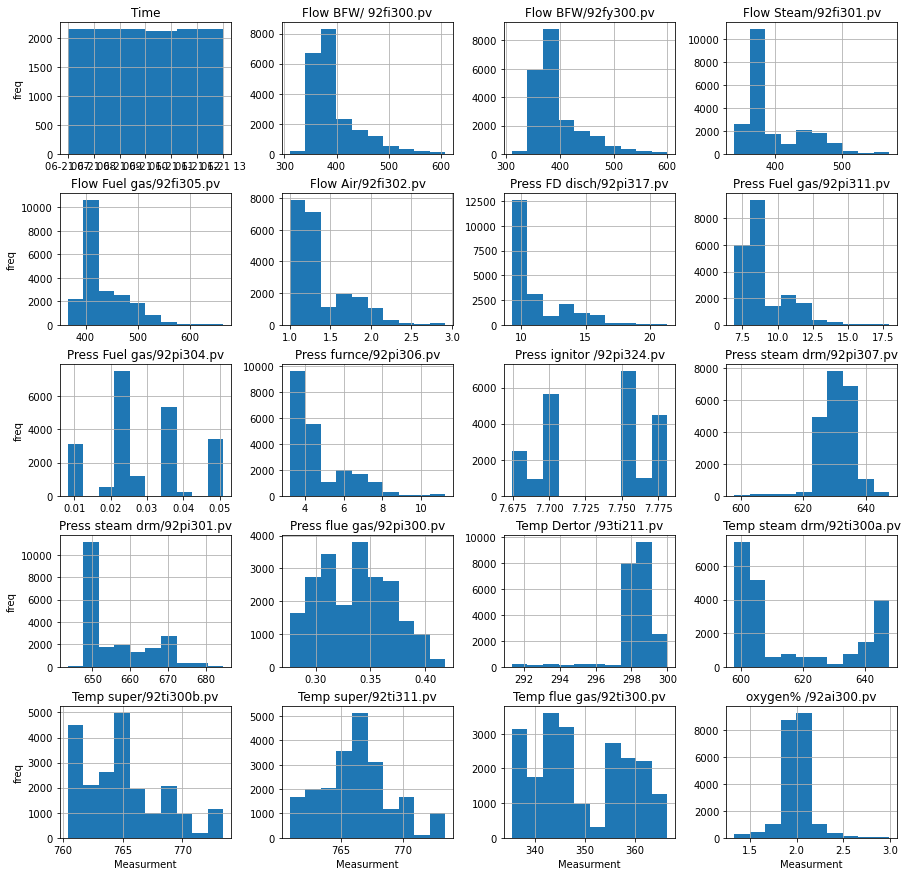

In [181]:
# Features distrubitons 
axlist = df.hist(figsize=(15,15), bins= 10)
for ax in axlist.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Measurment')
        
    if ax.is_first_col():
        ax.set_ylabel("freq")

In [182]:
# r= df.loc[(df['Press flue gas/92pi300.pv'] ==df['Press flue gas/92pi300.pv'])]
# g= r.index
# df.loc[g]

In [10]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
def maxMape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.max(np.abs((y_test - pred) / y_test))
    return mape

In [11]:
dfd = df.drop(['Press FD disch/92pi317.pv',
 'Press Fuel gas/92pi311.pv',
 'Press furnce/92pi306.pv',
 'Press ignitor /92pi324.pv',
 'Press steam drm/92pi307.pv',
 'Press steam drm/92pi301.pv',
 'Temp Dertor /93ti211.pv',
 'Temp steam drm/92ti300a.pv',
 'Temp super/92ti300b.pv'],axis=1)

# Press Flue gas/92pi304.pv as single variable LSTM Model :


In [12]:
# Input output
PFG = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
display(PFG.shape)
display(PFG.head())

(21494, 4)

,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv
2,355.848480,352.095337,401.596222,1.123510
3,355.877014,354.608063,401.471863,1.111719
4,355.905548,356.111176,401.347473,1.099927
5,355.934082,356.604675,401.223083,1.088136
6,355.962616,355.491791,401.098724,1.083197


In [13]:
ypf= dfd['Press Fuel gas/92pi304.pv']
ypf= ypf.to_numpy()
ypf= ypf.reshape(-1,1)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [15]:
s =StandardScaler()
s2 =StandardScaler()
s= s.fit(PFG)
s2= s2.fit(ypf)
PFG= s.transform(PFG)
ypf=s2.transform(ypf) 
PFG = pd.DataFrame(PFG)
display(PFG.head())
PFG['4'] = ypf
PFG= PFG.to_numpy()

,0,1,2,3
0,-0.881462,-0.999050,-0.776282,-0.779350
1,-0.880833,-0.943088,-0.779142,-0.815262
2,-0.880204,-0.909611,-0.782002,-0.851174
3,-0.879576,-0.898620,-0.784863,-0.887086
4,-0.878947,-0.923406,-0.787723,-0.902129


In [16]:
X= []
y= []
n1= 1
n2= 5
for i in range(n2, len(PFG)-n1 + 1):
    X.append(PFG[i-n2 : i, 0: PFG.shape[1]])
    y.append(PFG[i+n1-1:i+n1,4])

In [17]:
X, y =np.array(X), np.array(y)
X.shape , y.shape

((21489, 5, 5), (21489, 1))

In [191]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X,y,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [192]:
#Original test set
orig_y= dfd['Press Fuel gas/92pi304.pv'].iloc[indts]

In [193]:
model1 = Sequential()
model1.add(InputLayer((5, 5)))
model1.add(LSTM(64))
# model1.add(Dense(32, 'relu')) # Activate this cell for 4 Layers model
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                17920     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [194]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [195]:
train= model1.fit(X_train, y_train, validation_data=(X_val, y_val),verbose=1, epochs=20)

Epoch 1/20
430/430 [==============================] - 6s 5ms/step - loss: 0.2416 - root_mean_squared_error: 0.4915 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 2/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 3/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 4/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 5/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0384 - val_loss: 7.3525e-04 - val_root_mean_squared_error: 0.0271
Epoch 6/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 4.8437e-0

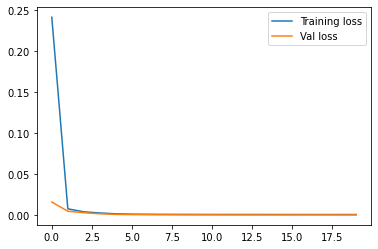

In [196]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

# 3 layers
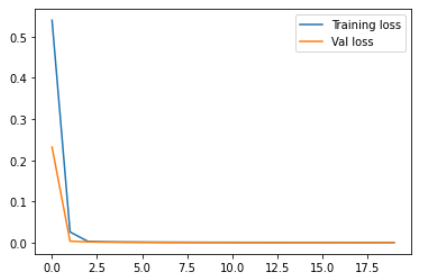, 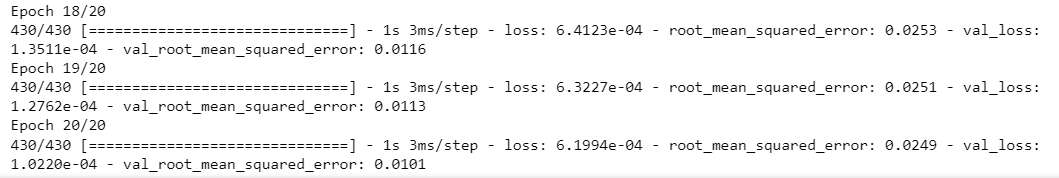
# 4 layers
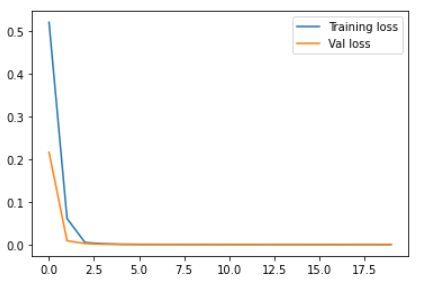, 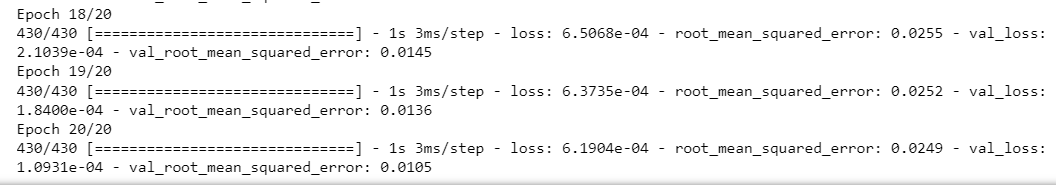

In [197]:
test_predictions = model1.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 1s 3ms/step


In [198]:
print(F"The MAPE value of Press Fuel gas/92pi304 {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test,test_predictions)}")

The MAPE value of Press Fuel gas/92pi304 0.007007264532148838
The Max MAPE value of oxygen% 1.2204279899597168


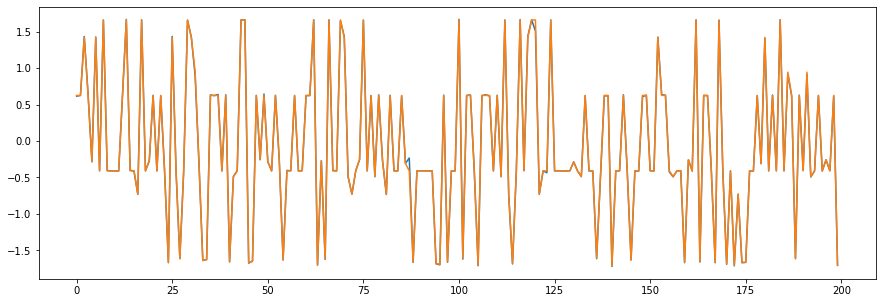

In [199]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
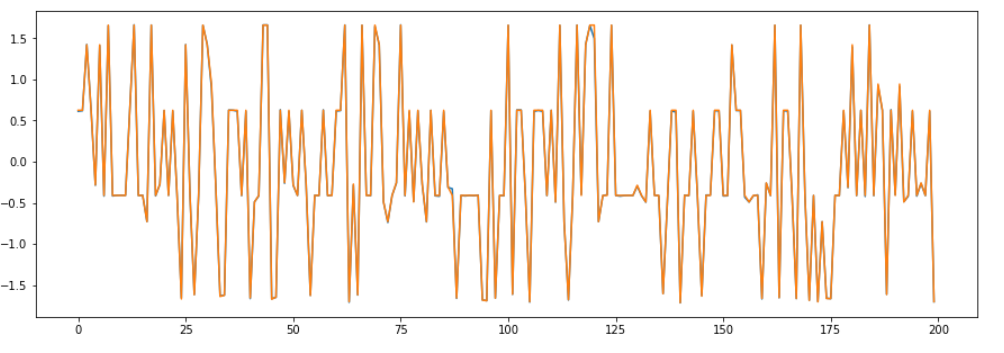

# 4 layers
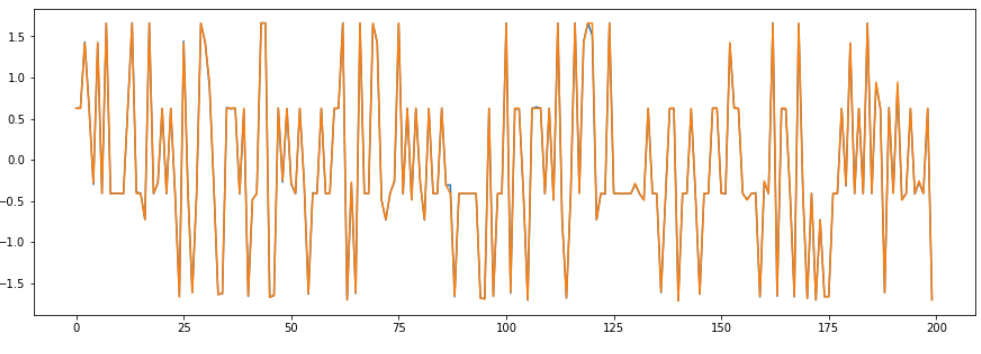

In [200]:
# y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv = np.array(test_predictions)
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= s2.inverse_transform(y_inv)
pd.DataFrame(y_inv)

,0
0,0.037730
1,0.037847
2,0.048084
3,0.038065
4,0.026344
...,...
4293,0.023769
4294,0.024743
4295,0.009086
4296,0.037884


In [201]:
orig_y= orig_y.to_numpy()

In [202]:
from sklearn.metrics import mean_squared_error as mse

The mean squared error=  2.5759235e-08


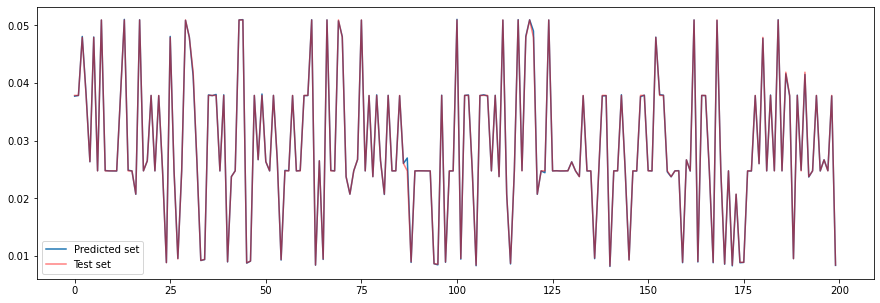

In [203]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

# Press Flue gas/92pi300.pv as single variable LSTM Model :


In [32]:
# Input output
P2 = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
P2.shape

(21494, 4)

In [33]:
y300= dfd['Press flue gas/92pi300.pv']
y300= y300.to_numpy()
y300= y300.reshape(-1,1)

In [34]:
ss =StandardScaler()
ss2 =StandardScaler()
ss= ss.fit(P2)
ss2= ss2.fit(y300)
P2= ss.transform(P2)
y300=ss2.transform(y300) 
P2 = pd.DataFrame(P2)
P2['13'] = y300
P2= P2.to_numpy()

In [35]:
X1= []
y1= []
n1= 1
n2= 5
for i in range(n2, len(P2)-n1 +1):
    X1.append(P2[i-n2 : i, 0: P2.shape[1]])
    y1.append(P2[i+n1-1:i+n1,4])

In [36]:
X1, y1 =np.array(X1), np.array(y1)
X1.shape , y1.shape

((21489, 5, 5), (21489, 1))

In [37]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X1,y1,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [38]:
#Original test set
orig_y= dfd['Press flue gas/92pi300.pv'].iloc[indts]

In [39]:
model2 = Sequential()
model2.add(InputLayer((5, 5)))
model2.add(LSTM(64))
model2.add(Dense(32, 'relu')) # Activate this cell for 4 Layers model
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20,273
Trainable params: 20,273
Non-trainable params: 0
_________________________________________________________________


In [40]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [41]:
train= model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
430/430 [==============================] - 11s 11ms/step - loss: 0.3202 - root_mean_squared_error: 0.5659 - val_loss: 0.0690 - val_root_mean_squared_error: 0.2626
Epoch 2/20
430/430 [==============================] - 3s 7ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897
Epoch 3/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 4/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0065 - root_mean_squared_error: 0.0804 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 5/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0059 - root_mean_squared_error: 0.0766 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 6/20
430/430 [==============================] - 3s 8ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0052 - va

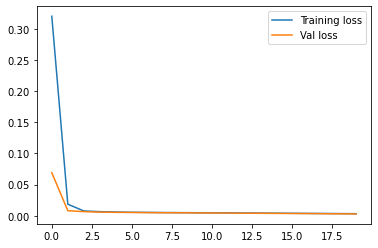

In [42]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

In [43]:
# 3 layers
# ![image.png](attachment:image.png), ![image-2.png](attachment:image-2.png)
# # 4 layers
# ![image-4.png](attachment:image-4.png), ![image-3.png](attachment:image-3.png)

In [44]:
test_predictions = model2.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 2s 3ms/step


In [45]:
print(F"The MAPE value of Press flue gas/92pi300 {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test,test_predictions)}")

The MAPE value of Press flue gas/92pi300 0.19885750114917755
The Max MAPE value of oxygen% 137.87344360351562


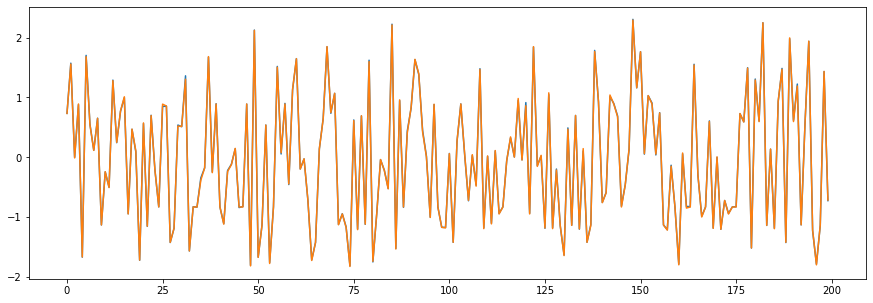

In [217]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
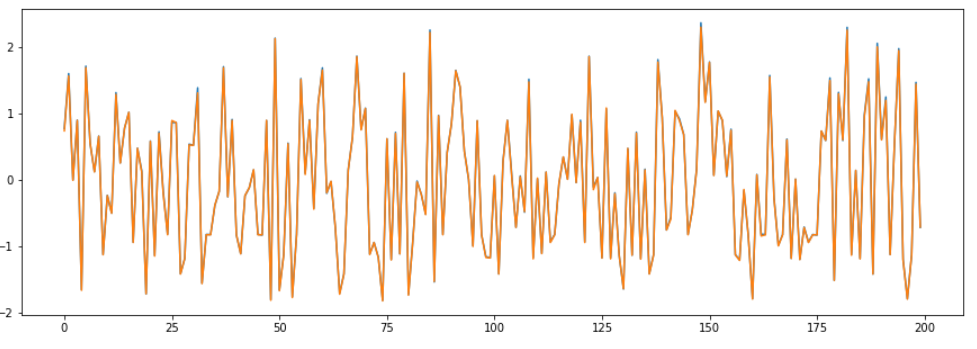

# 4 layers
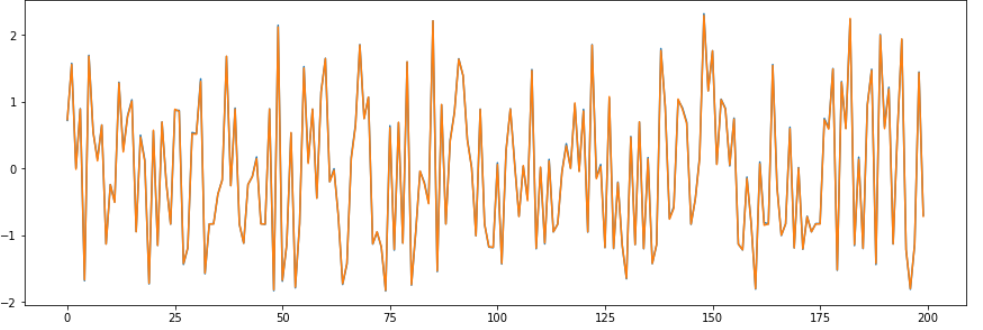

In [218]:
y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= ss2.inverse_transform(y_inv)[:,0]
y_inv

array([0.35922393, 0.386253  , 0.33556214, ..., 0.30895898, 0.34280065,
       0.2840265 ], dtype=float32)

In [219]:
orig_y= orig_y.to_numpy()

The mean squared error=  4.609657e-06


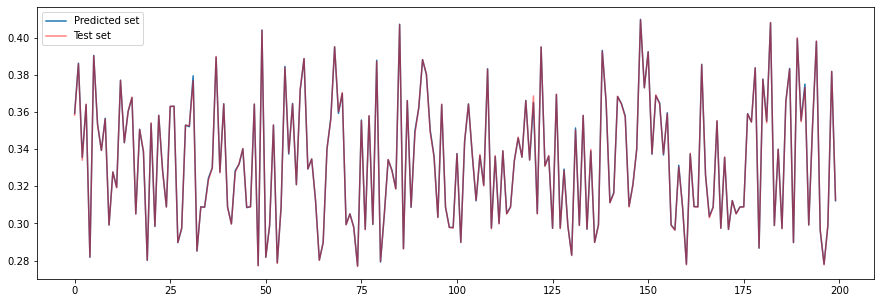

In [220]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

# Temp flue gas/92ti300.pv' as single output LSTM Model


In [221]:
# Input output
P3 = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
P3.shape

(21494, 4)

In [222]:
y400= dfd['Temp flue gas/92ti300.pv']
y400= y400.to_numpy()
y400= y400.reshape(-1,1)

In [223]:
ss3 =StandardScaler()
ss4 =StandardScaler()
ss3= ss3.fit(P3)
ss4= ss4.fit(y400)
P3= ss3.transform(P3)
y400=ss4.transform(y400) 
P3 = pd.DataFrame(P3)
P3['13'] = y400
P3= P3.to_numpy()

In [224]:
X2= []
y2= []
n1= 1
n2= 5
for i in range(n2, len(P3)-n1 +1):
    X2.append(P3[i-n2 : i, 0: P3.shape[1]])
    y2.append(P3[i+n1-1:i+n1,4])

In [225]:
X2, y2 =np.array(X2), np.array(y2)
X2.shape , y2.shape

((21489, 5, 5), (21489, 1))

In [226]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X2,y2,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [227]:
#Original test set
orig_y= dfd['Temp flue gas/92ti300.pv'].iloc[indts]

In [228]:
model3 = Sequential()
model3.add(InputLayer((5, 5)))
model3.add(LSTM(64))
# model3.add(Dense(32, 'relu')) # Activate this cell for 4 Layers model
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                17920     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [229]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [230]:
train= model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
430/430 [==============================] - 6s 7ms/step - loss: 0.2259 - root_mean_squared_error: 0.4753 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 2/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0574
Epoch 3/20
430/430 [==============================] - 3s 6ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0418
Epoch 4/20
430/430 [==============================] - 3s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 5/20
430/430 [==============================] - 3s 6ms/step - loss: 9.9775e-04 - root_mean_squared_error: 0.0316 - val_loss: 7.0925e-04 - val_root_mean_squared_error: 0.0266
Epoch 6/20
430/430 [==============================] - 2s 6ms/step - loss: 6.8590e-04 - root_mean_squared_error: 0.0262 - val_loss: 4

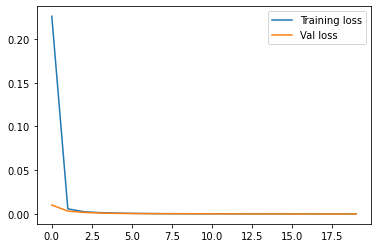

In [231]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

# 3 layers
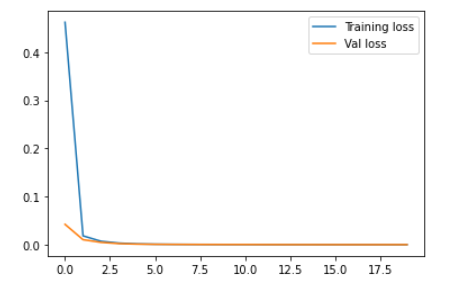, 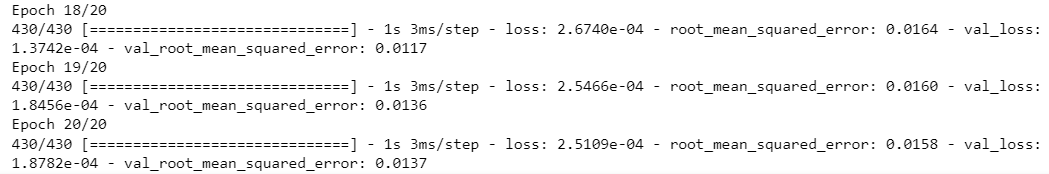
# 4 layers
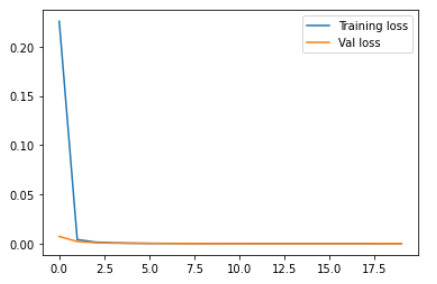, 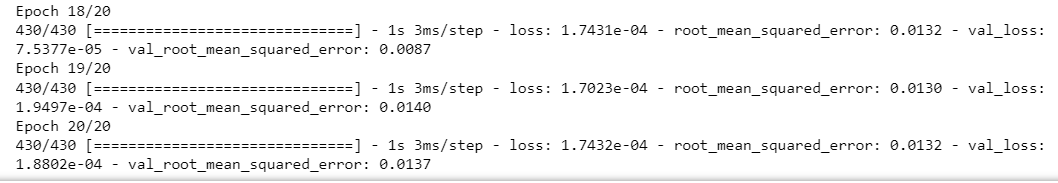

In [232]:
test_predictions = model3.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 1s 1ms/step


In [233]:
print(F"The MAPE value of Temp flue gas/92ti300 {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test,test_predictions)}")

The MAPE value of Temp flue gas/92ti300 0.02273036353290081
The Max MAPE value of oxygen% 3.0164921283721924


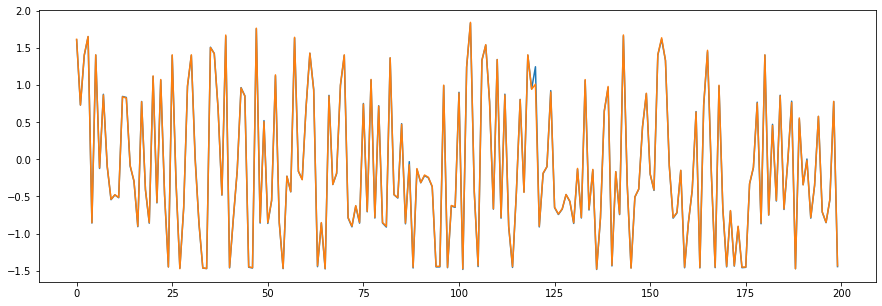

In [234]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
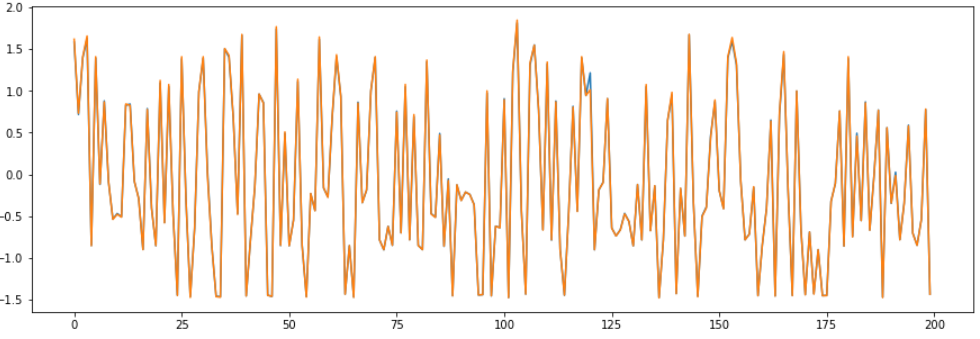

# 4 layers
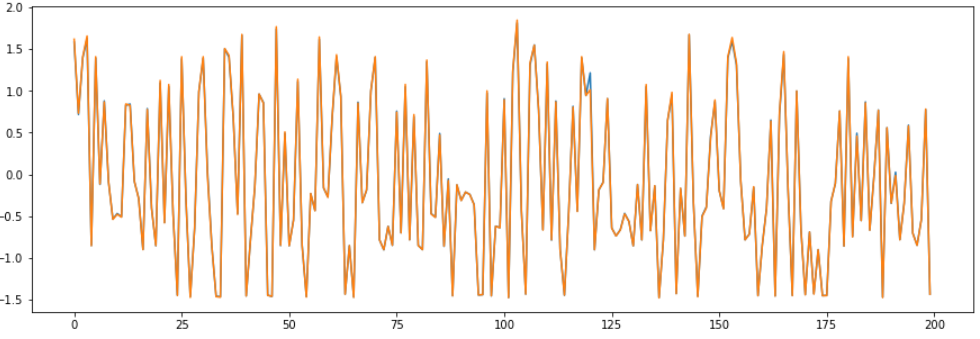

In [235]:
y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= ss4.inverse_transform(y_inv)[:,0]
y_inv

array([364.1164 , 355.99515, 362.18375, ..., 335.62643, 360.8526 ,
       341.20734], dtype=float32)

In [236]:
orig_y= orig_y.to_numpy()

The mean squared error=  0.0071221436


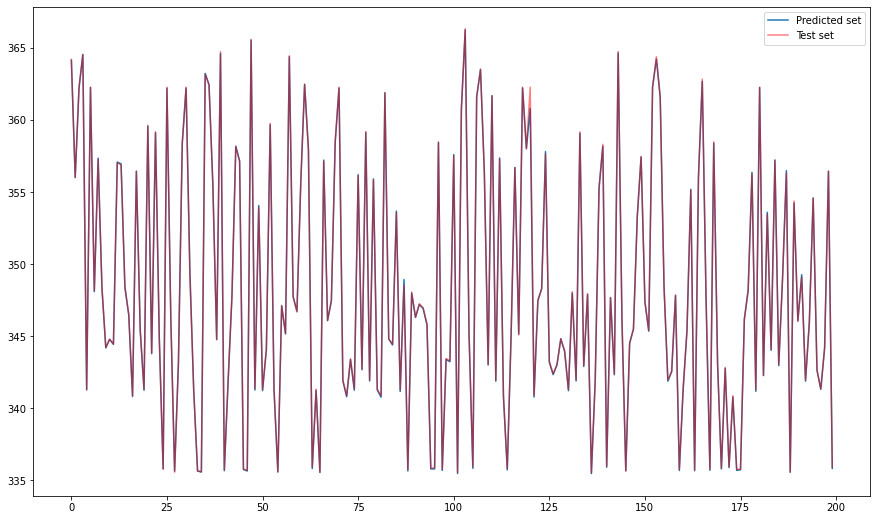

In [237]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(9)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

# 'oxygen% /92ai300.pv' as single output LSTM Model

In [259]:
P4 = dfd.drop(['Time','Flow BFW/92fy300.pv','Press flue gas/92pi300.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv','Press Fuel gas/92pi304.pv'], axis=1)
P4.shape

(21494, 4)

In [260]:
y500= dfd['oxygen% /92ai300.pv']
y500= y500.to_numpy()
y500= y500.reshape(-1,1)

In [261]:
ss5 =StandardScaler()
ss6 =StandardScaler()
ss5= ss5.fit(P4)
ss6= ss6.fit(y500)
P4= ss5.transform(P4)
y500=ss6.transform(y500) 
P4 = pd.DataFrame(P4)
P4['13'] = y500
P4= P4.to_numpy()

In [262]:
X3= []
y3= []
n1= 1
n2= 5
for i in range(n2, len(P4)-n1 +1):
    X3.append(P4[i-n2 : i, 0: P4.shape[1]])
    y3.append(P4[i+n1-1:i+n1,4])

In [263]:
X3, y3 =np.array(X3), np.array(y3)
X3.shape , y3.shape

((21489, 5, 5), (21489, 1))

In [264]:
indecies = np.array([i for i in range(21489)])
X_train, X_test, y_train, y_test, indtr,indts = train_test_split(X3,y3,indecies, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [265]:
orig_y= dfd['oxygen% /92ai300.pv'].iloc[indts]

In [266]:
model4 = Sequential()
model4.add(InputLayer((5, 5)))
model4.add(LSTM(64))
# model4.add(Dense(32, 'relu'))  # Activate this cell for 4 Layers model
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                17920     
                                                                 
 dense_32 (Dense)            (None, 8)                 520       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [267]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [268]:
train= model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
430/430 [==============================] - 5s 5ms/step - loss: 0.4522 - root_mean_squared_error: 0.6724 - val_loss: 0.2282 - val_root_mean_squared_error: 0.4777
Epoch 2/20
430/430 [==============================] - 2s 3ms/step - loss: 0.0969 - root_mean_squared_error: 0.3113 - val_loss: 0.0569 - val_root_mean_squared_error: 0.2386
Epoch 3/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0328 - root_mean_squared_error: 0.1810 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1705
Epoch 4/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0193 - root_mean_squared_error: 0.1389 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 5/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1177
Epoch 6/20
430/430 [==============================] - 1s 3ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0112 - val_

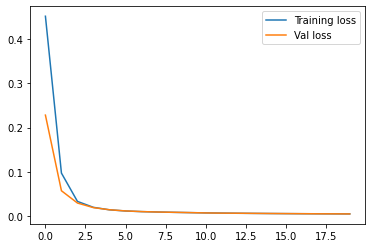

In [269]:
plt.plot(train.history['loss'], label= 'Training loss')
plt.plot(train.history['val_loss'], label= 'Val loss')
plt.legend()

# 3 layers
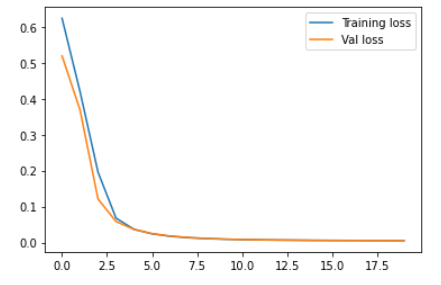, 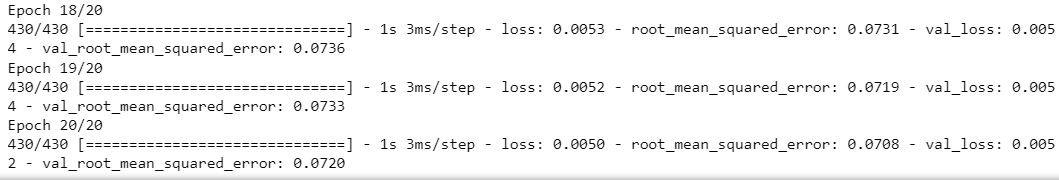

# 4 layers
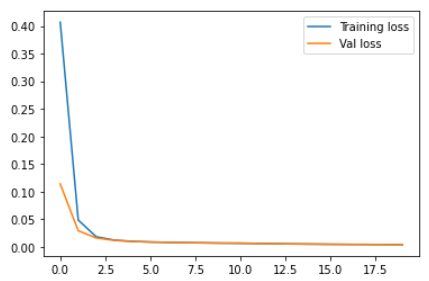, 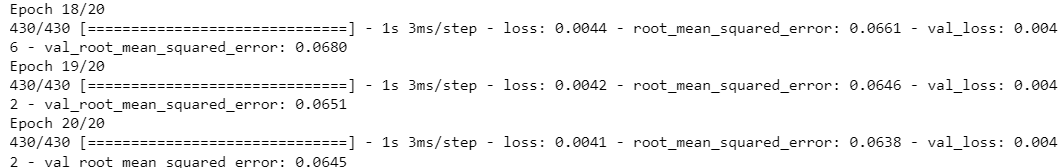

In [270]:
test_predictions = model4.predict(X_test).flatten()
y_test = y_test.flatten()

135/135 [==============================] - 1s 1ms/step


In [271]:
print(F"The MAPE value of oxygen% {mape(y_test,test_predictions)}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test,test_predictions)}")

The MAPE value of oxygen% 0.5189873576164246
The Max MAPE value of oxygen% 193.885498046875


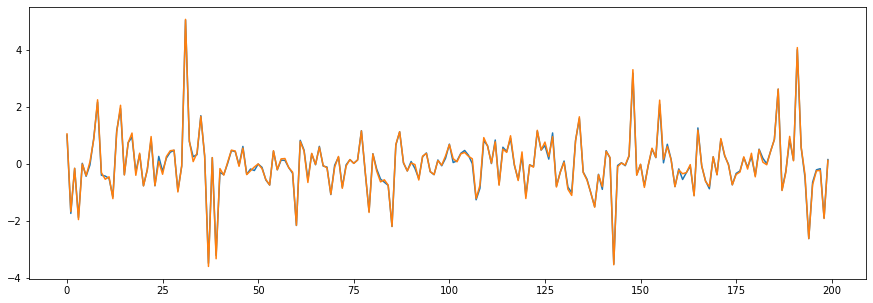

In [272]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(test_predictions[:200])
plt.plot(y_test[:200])

# 3 layers
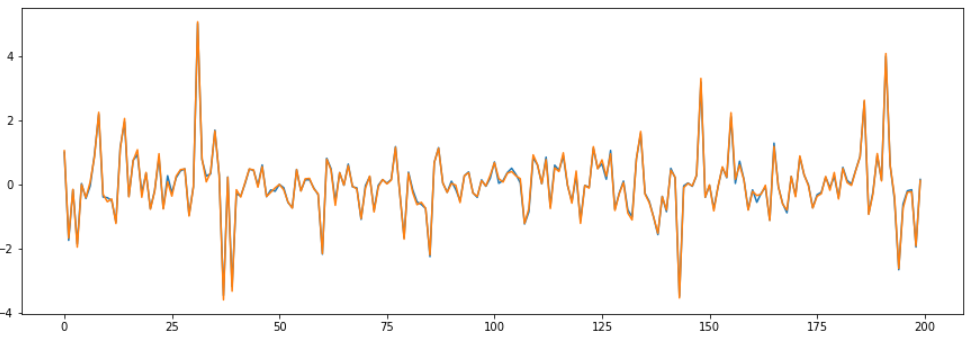
# 4 layers
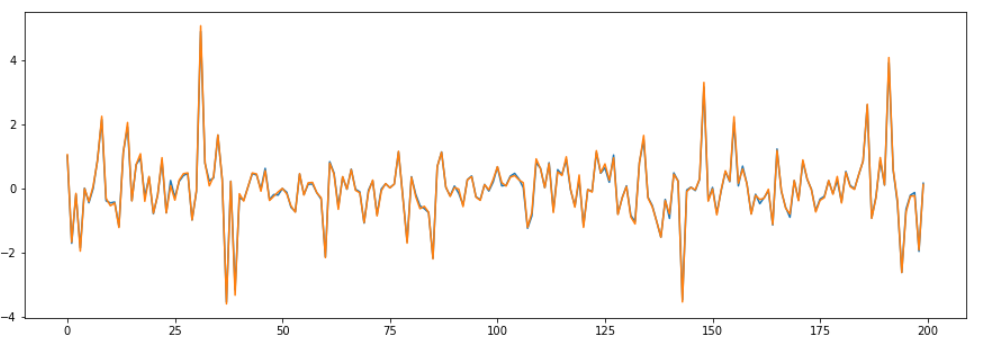

In [273]:
y_inv=np.array([test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions,test_predictions])
y_inv= pd.DataFrame(y_inv.transpose())
y_inv= ss6.inverse_transform(y_inv)[:,0]
y_inv

array([2.1607058, 1.7132887, 1.9702394, ..., 1.8542209, 2.056643 ,
       2.1316204], dtype=float32)

In [274]:
orig_y= orig_y.to_numpy()

The mean squared error=  0.0005050559


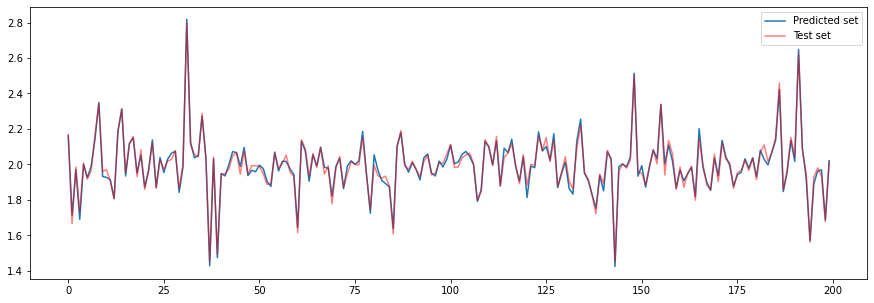

In [275]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(y_inv[:200], label= 'Predicted set')
plt.plot(orig_y[:200],color='r', label= 'Test set', alpha=0.5)
plt.legend()
print('The mean squared error= ',mse(y_inv,orig_y))

In [276]:
# display(train.history)